# **Star or Galaxy?**
In this project we provide an application of CNNs' algorithm for the classification of a set of real pieces of astronomic images.


In [1]:
# importing the libraries and modules

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Data preparation

In [3]:
# Directory delle immagini
dataset_dir = 'Cutout Files'

# Dimensioni delle immagini
img_height, img_width = 150, 150
batch_size = 32

# Generatore di immagini con augmentazione dei dati
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 3190 images belonging to 2 classes.
Found 796 images belonging to 2 classes.


# Definition and training of the CNN model

In [4]:
# definition

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# training

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=25,
    callbacks=[early_stop]
)

C:\Users\tesei\miniforge3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


C:\Users\tesei\miniforge3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7580 - loss: 0.7777 - val_accuracy: 0.7669 - val_loss: 0.5334
Epoch 2/25
 1/99 ━━━━━━━━━━━━━━━━━━━━ 1:24 862ms/step - accuracy: 0.6250 - loss: 0.7595

C:\Users\tesei\miniforge3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6250 - loss: 0.7595 - val_accuracy: 0.6786 - val_loss: 0.6337
Epoch 3/25
99/99 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.7641 - loss: 0.5206 - val_accuracy: 0.7747 - val_loss: 0.4203
Epoch 4/25
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.4381 - val_accuracy: 0.6429 - val_loss: 0.6916
Epoch 5/25
99/99 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.7977 - loss: 0.4098 - val_accuracy: 0.8294 - val_loss: 0.3792
Epoch 6/25
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7812 - loss: 0.3811 - val_accuracy: 0.8214 - val_loss: 0.3878
Epoch 7/25
99/99 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8251 - loss: 0.3653 - val_accuracy: 0.8451 - val_loss: 0.3465
Epoch 8/25
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.2528 - val_accuracy: 0.8571 - val_loss: 0.3150
Epoch 9/25
99/99 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.8643 - loss: 0.3027 - val_accuracy: 0.8490 - val_loss: 0.3413

# Model evaluation

In [5]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

# Report di classificazione
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=validation_generator.class_indices.keys()))

# Matrice di confusione
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.8512 - loss: 0.3493
Validation Accuracy: 85.05%
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 287ms/step
Classification Report
              precision    recall  f1-score   support

      galaxy       0.23      0.26      0.24       188
        star       0.76      0.73      0.74       608

    accuracy                           0.62       796
   macro avg       0.49      0.49      0.49       796
weighted avg       0.63      0.62      0.62       796

Confusion Matrix
[[ 48 140]
 [165 443]]


In [22]:
# Saving the model
model.save('astronomy_classification_model.h5')


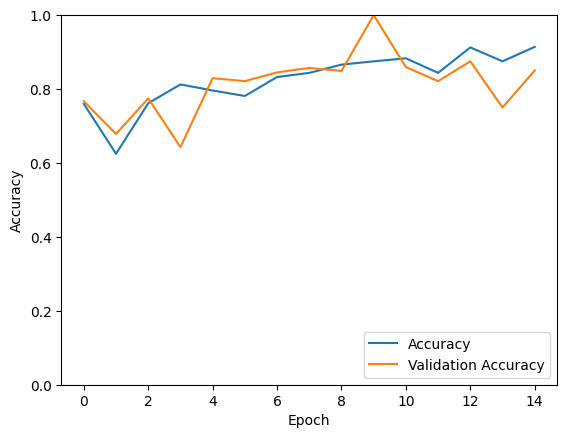

In [23]:
# **Output visualization**

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# **Forecast on new images:**

We now try our CNN model on new astronomical takes; in particular, we try to classify the following

<img src="JADES-GS-z14-0_bbc.jpg" alt="JADES-GS-z14-0_by_bbc" width="300"/>

being a picture by James Webb Space Telescope of the oldest galaxy ever observed (see [Wired article](https://wired.me/science/james-webb-space-telescope-uncovers-the-oldest-galaxy-in-the-universe/))

In [12]:
from tensorflow.keras.preprocessing import image

img_path = 'JADES-GS-z14-0_bbc.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Forecast
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(train_generator.class_indices.keys())
print(f'Predicted Class: {class_labels[predicted_class[0]]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted Class: galaxy


Notice that the image of the galaxy JADES-GS-z14-0 is correctly classified.

Let's now try to apply our DL classification algorithm to images that are not real astronomical photographs, but digital reconstructions.

First, we test on a digitalisation of the JADES-GS-z14-0 galaxy:

<img src="JADES-GS-z14-0.jpg" alt="Digital JADES-GS-z14-0" width="300"/>

and we see the forecast to not predict the correct class.

In [13]:
img_path = 'JADES-GS-z14-0.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Forecast
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(train_generator.class_indices.keys())
print(f'Predicted Class: {class_labels[predicted_class[0]]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Class: star


Let's try on a digital image of the sun

<img src="sun.jpg" alt="TheSun" width="300"/>

In [15]:
img_path = 'sun.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Forecast
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(train_generator.class_indices.keys())
print(f'Predicted Class: {class_labels[predicted_class[0]]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: galaxy


which is wrong again. It seems the algorithm to not work well on digital pictures. 

Let's try on some of the 12 galaxies observed by Hubble telescope ([source](https://www.eurekalert.org/multimedia/831651))

<img src="12_galaxies_Hubble.jpg" alt="Galaxies" width="300"/>

In [17]:
img_path = 'J1558+3957.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Forecast
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(train_generator.class_indices.keys())
print(f'Predicted Class: {class_labels[predicted_class[0]]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: galaxy


In [21]:
img_path = 'J0826+4305.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Forecast
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(train_generator.class_indices.keys())
print(f'Predicted Class: {class_labels[predicted_class[0]]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Class: star


In [20]:
img_path = 'J2140+1209.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Forecast
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)
class_labels = list(train_generator.class_indices.keys())
print(f'Predicted Class: {class_labels[predicted_class[0]]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Class: star


It turns out our model to be heavily constrained by the training images, which are real astronomical pictures on the form

<img src="sn12c01_03_1012_1178_3.jpg" alt="RealStar" width="150"/>

and it struggles on images that have been enhanced and refined.

That is not necessarily a drawback, as these types of models are used for real images.